In [7]:
!pip install opencv-python
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata (19 kB)
  Obtaining dependency information for numpy>=1.21.2 from https://files.pythonhosted.org/packages/e8/06/0512e2582fd27bb7b358fa1e4ffc0f6c89c89f5ada31df58c5fa93171098/numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 6.8 MB/s eta 0:00:00
Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 10.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
video = cv2.VideoCapture("data/video.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

689 frames read.


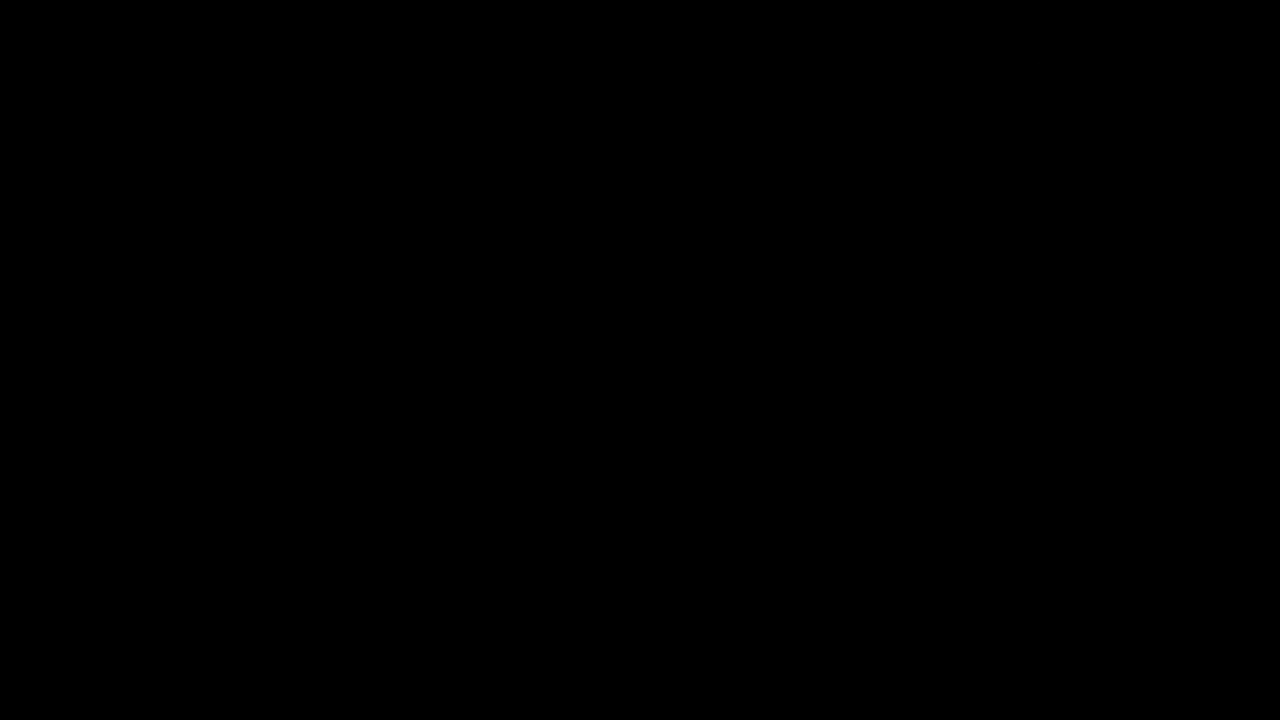

In [17]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [18]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
}

from openai import AsyncOpenAI

client = AsyncOpenAI()

completion = await client.chat.completions.create(**params)
print(completion)

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4-vision-preview in organization org-QpjmZ7x7lvYT819ZJJKYxh1Y on tokens per min. Limit: 40000 / min. Please try again in 1ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}